In [1]:
import torch
import PIL
import numpy as np
from PIL import Image

In [196]:
def nearest_neighbour_mean(x):

    def cluster(x):
        out = []
        # Iterate each row
        for i in range(len(x)):
            if i-1 < 0:
                out.append(torch.mean(x[i:i+2], dim=0))

            elif i+1 < len(x):
                frame = torch.stack([x[i-1], x[i+1]]).to("cuda")
                diffs = torch.stack([ abs(x[i]-x[i-1]), abs(x[i]-x[i+1])])
                index = torch.min(diffs, dim=0).indices[:,0]
                minvl = torch.stack([frame[j,i,:] for i,j in enumerate(index)])
                out.append(torch.mean(torch.stack([minvl, x[i]]), dim=0))

            else:
                out.append(torch.mean(x[i-1:i+1], dim=0))
        # Stack 
        out = torch.stack(out, dim=0)
        return out.type(torch.int16)
    
    # Run clustering on data
    meaned_v = cluster(x)
    meaned_h = torch.transpose(cluster(torch.transpose(x, 0, 1)), 0, 1)
    
    # Differrence between original and meaned
    diff_v = x - meaned_v
    diff_h = x - meaned_h
    
    return diff_v, diff_h

In [197]:
ricardo = [[240, 128, 128], [70, 130, 180], [135, 206, 235], [240, 128, 128]]
gerzon =  [[61, 255, 255], [0, 130, 255], [220, 220, 220], [61, 255, 255]]
miguel =  [[159, 100, 227], [105, 224, 240], [93, 240, 118], [159, 100, 227]]

rgm = torch.tensor([ricardo, gerzon, miguel]).to("cuda").type(torch.float16)

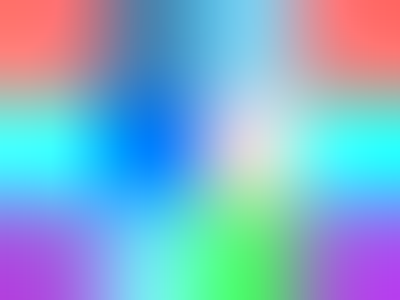

In [198]:
Image.fromarray(rgm.to("cpu").numpy().astype(np.uint8)).resize((400,300))

In [199]:
nnm = nearest_neighbour_mean(rgm)
print(nnm)
Image.fromarray(nnm.to("cpu").numpy().astype(np.uint8)).resize((400,300))

(tensor([[[ 90., -63., -63.],
         [ 35.,   0., -37.],
         [-42.,  -7.,   8.],
         [ 90., -63., -63.]],

        [[-49.,  78.,  14.],
         [-35.,   0.,  38.],
         [ 43.,   7.,  -7.],
         [-49.,  78.,  14.]],

        [[ 49., -77., -14.],
         [ 53.,  47.,  -7.],
         [-63.,  10., -51.],
         [ 49., -77., -14.]]], device='cuda:0', dtype=torch.float16), tensor([[[ 85.,  -1., -26.],
         [-32., -38., -27.],
         [ 33.,  38.,  28.],
         [ 53., -39., -53.]],

        [[ 31.,  63.,   0.],
         [-30., -62.,   0.],
         [ 80., -17., -17.],
         [-79.,  18.,  18.]],

        [[ 27., -62.,  -6.],
         [  6.,  -8.,  61.],
         [ -6.,   8., -61.],
         [ 33., -70.,  55.]]], device='cuda:0', dtype=torch.float16))


AttributeError: 'tuple' object has no attribute 'to'

In [144]:
nnm_2 = nearest_neighbour_mean(nnm.type(torch.float32))
Image.fromarray(nnm_2.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

IndexError: too many indices for tensor of dimension 1